# Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller, acf

In [2]:
def test_stationarity(timeseries):
    """ Проверка временного ряда на стационарность
    """
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(tseries, lags=None):
    """ Проверка ряда на стационарность и вывод графика автокоррелации и частной автокорреляции
    """
    
    test_stationarity(tseries)
    if not isinstance(tseries, pd.Series):
        tseries = pd.Series(tseries)
        
    f, axes = plt.subplots(3, 1, figsize=(14,10))
    
    series_ax = axes[0]
    acf_ax = axes[1]
    pacf_ax = axes[2]
    
    tseries.plot(ax=series_ax)
    
    smt.graphics.plot_acf(tseries, ax=acf_ax, lags=lags, alpha=0.05)
    smt.graphics.plot_pacf(tseries, ax=pacf_ax)
    
    plt.show()

## 1 Анализ и приведение к стационарному ряду данных продаж компании

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


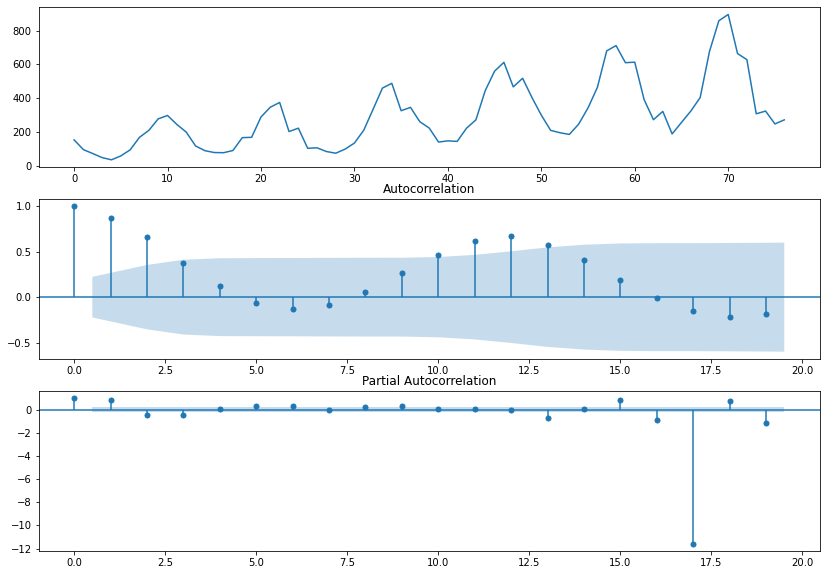

In [4]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
tseries = sales_of_company_x['Count']
tsplot(tseries)

Тест Дики-Фуллера не отвергает нулевую гипотезу о нестационарности ряда. При этом по графику данных видно, что с увеличением времени увеличивается размер колебания возле тренда. Это может говорить о мультипликативной схеме формирования значений  ряда и наличии тредна по дисперсии.

Для сглаживания тенденции дисперсии применим преобразование Бокса-Кокса

In [5]:
tseries_boxcox = boxcox(tseries, lmbda=0.01)

Results of Dickey-Fuller Test:
Test Statistic                 -0.895419
p-value                         0.789477
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


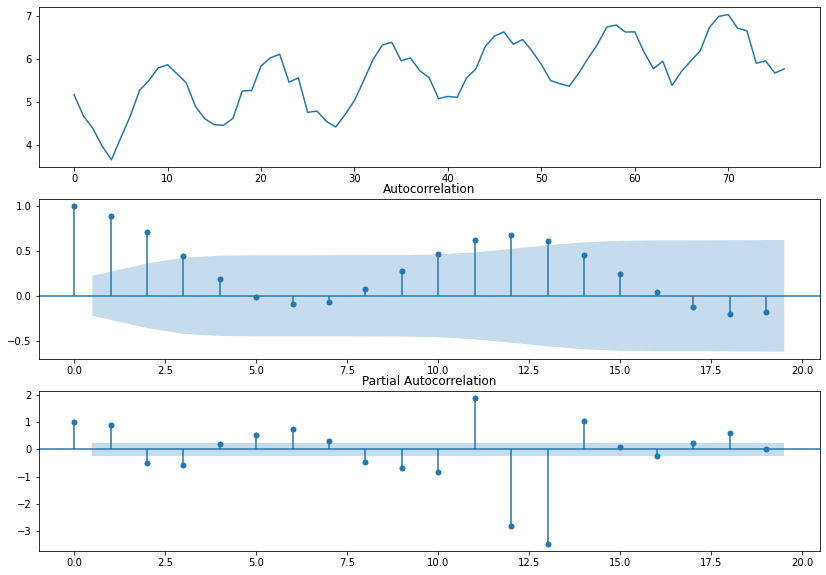

In [6]:
tsplot(tseries_boxcox)

Тенденция по дисперции убрана, но осталась тендеция среднего значения. Тест Дика-Фуллера не пройден. Так как закон формирования значений похож на линейный, то тенденцию среднего можно убрать с помощью дифференцирования первого порядка

In [7]:
tseries_diff = np.diff(tseries_boxcox, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.140951
p-value                         0.023667
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


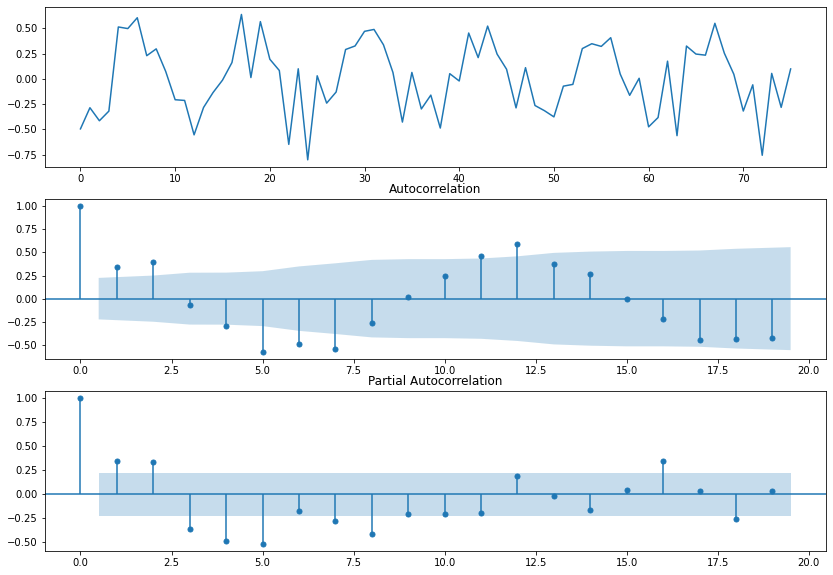

In [8]:
tsplot(tseries_diff)

После диффиринцирования первого уровня тест Дики-Фуллера пройден, но в графике данных наблюдается сезонность размером в 12 месяцев. Попробуем убрать ее.

Results of Dickey-Fuller Test:
Test Statistic                -7.629771e+00
p-value                        2.023361e-11
#Lags Used                     1.100000e+01
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


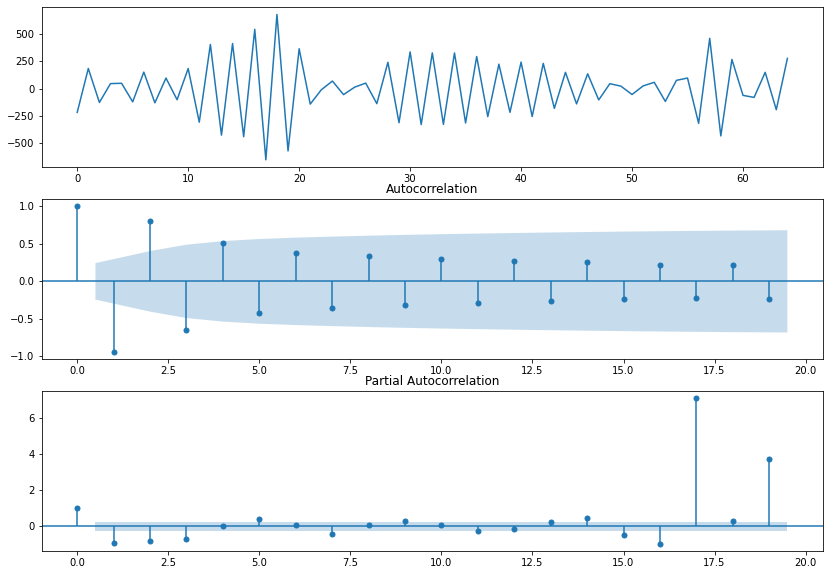

In [9]:
tseries_diff_season = np.diff(tseries_boxcox, 12)
tsplot(tseries_diff_season)

## 2 Анализ и приведение к стационарному ряду данных о ежемесячных бостонских ограблениях

In [10]:
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
tseries = robberies_in_boston['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


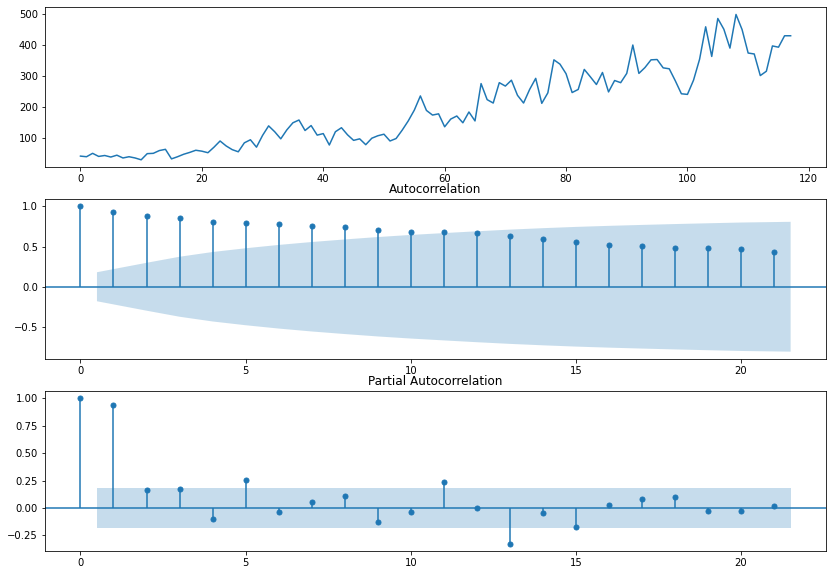

In [11]:
tsplot(tseries)

По полученным данным можно сказать, что присутствует тенденции среднего и дисперсии. Сезонность и циклы неочевидны. Поэтому для начала применим преобразование Бокса-Кокса для устранения тенденции дисперсии

Results of Dickey-Fuller Test:
Test Statistic                  -1.983246
p-value                          0.293967
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


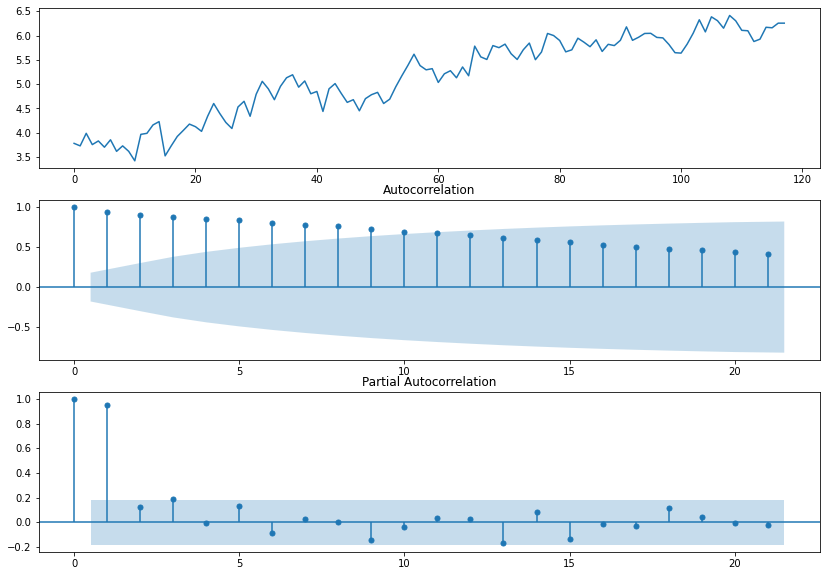

In [12]:
tseries_boxcox = boxcox(tseries, lmbda=0.01)
tsplot(tseries_boxcox)

Тенденция дисперсии убрана, тест Дики-Фулера показал более лучшие результаты. Теперь уберем тенденцию среднего с помощью дифференцирования первого уровня

Results of Dickey-Fuller Test:
Test Statistic                -7.589353e+00
p-value                        2.555826e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


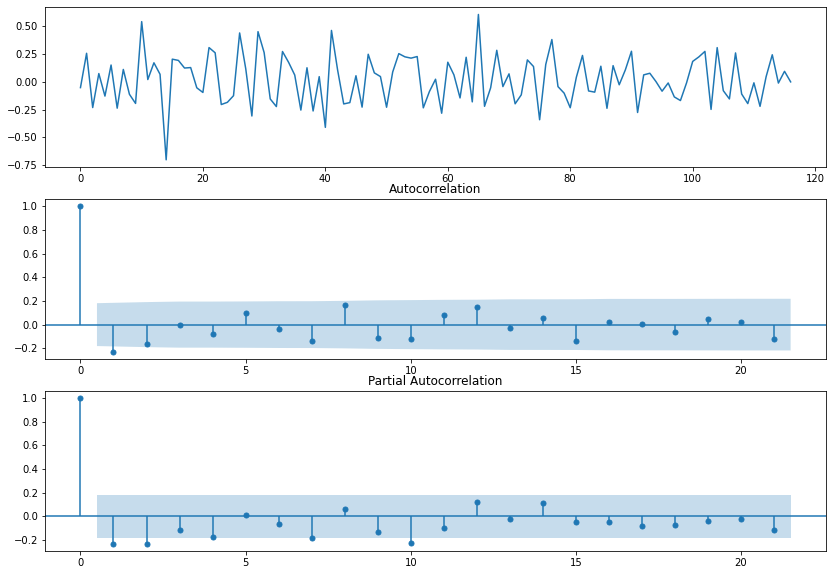

In [13]:
tseries_diff = np.diff(tseries_boxcox, 1)
tsplot(tseries_diff)

Тест Дики-Фуллера пройден, график данных похож на стационарный ряд.

## 3 Анализ и приведение к стационарному виду ряда закрытия промышленного индекса Доу-Джонса

In [14]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
tseries = dowjones_closing['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


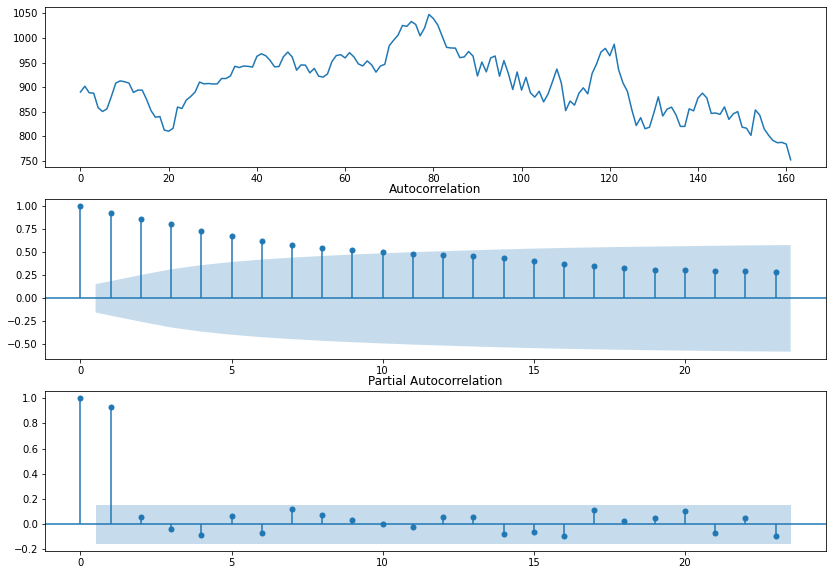

In [15]:
tsplot(tseries)

Из графика данных и коррелограммы можно сделать вывод, что даныне имеют тенденцию средного, при этом циклы и тенденция дисперсии не наблюдаются. Тест Дики-Фуллера не пройден. Для приведения ряда к стационарному попробуем просто выполнить дифференцирование первого уровня.

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


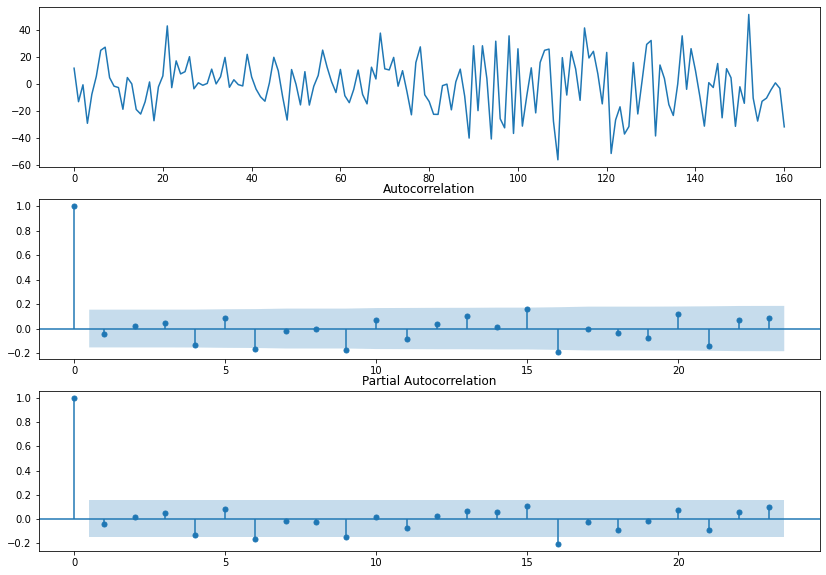

In [16]:
tseries_diff = np.diff(tseries, 1)
tsplot(tseries_diff)

Теперь тест Дики-Фуллера пройден график данных похож на стационарный ряд.